**Google Playstore Analysis Using Python.**

Dataset has the information about the Apps,Rating & Downloads of Google Playstore.

**Importing Libraries.**

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Read Data.**

In [85]:
df=pd.read_csv("googleplaystore-dataset.csv")

**Exploring Dataset.**

.shape gives the information of records and columns of dataframe.

In [86]:
df.shape

(10841, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* Dataset has 10841 rows and 13 columns.
* Categorical features - Category,Type,Content rating,Genres,
* Numerical features - Rating,reviews,size,install,price,current version
* There are null values in Rating,Type,Content rating,Current version,Android version.

.columns shows all the columns of dataframe.

In [88]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

.nunique gives the unique values of each column.

In [89]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

Find out null values in the dataframe.

In [90]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

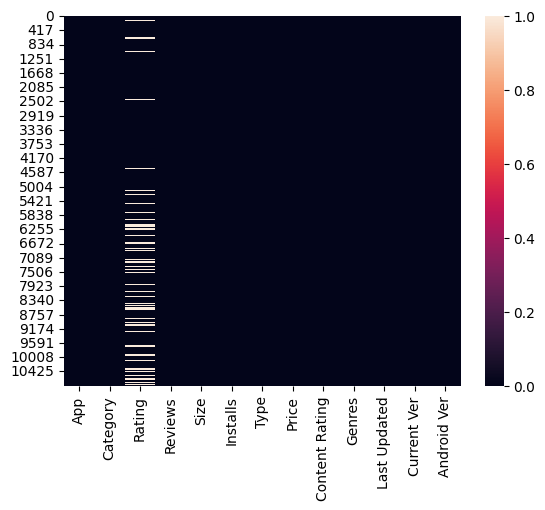

In [91]:
sns.heatmap(df.isnull())
plt.show()

Dropping the null values as it does not make a big difference.

In [92]:
df.dropna(axis = 0, inplace =True)

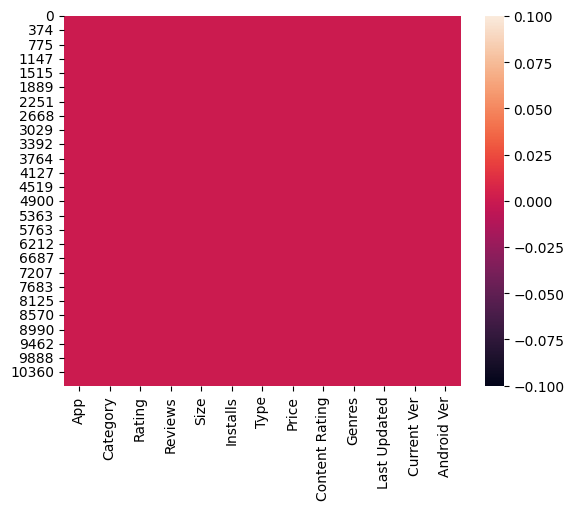

In [93]:
sns.heatmap(df.isnull())
plt.show()

Now check the duplicate values in the dataframe.

In [94]:
df.duplicated().sum()

474

In [95]:
df.drop_duplicates(keep='first',inplace=True)

In [96]:
df.duplicated().sum()

0

* There were around 474 duplicate values.
* We have dropped them.

Check the unique categories and drop the categories which are invalid.

In [97]:
list(pd.unique(df['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [98]:
df=df[df['Category']!='1.9']

* We have removed a category named 1.9 which is invalid.

Changing the datatypes for required columns.

In [99]:
df.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10420,Wallpapers Volvo FH Truck,PERSONALIZATION,4.2,4,14M,100+,Free,0,Teen,Personalization,"July 31, 2016",1.0,2.3.3 and up


In [100]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [101]:
df['Reviews']=df['Reviews'].astype('int')

In [102]:
df['Price']=df['Price'].str.replace('$','',regex=True)

In [103]:
df['Price']=df['Price'].astype(float)

ValueError: could not convert string to float: '$4.99'

In [ ]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [ ]:
df['updated_year'] = df['Last Updated'].dt.year

In [ ]:
df.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
9676,Masha and the Bear. Games for kids,FAMILY,4.6,6231,31M,"1,000,000+",Free,0,Everyone,Educational;Pretend Play,2018-07-13,2.6,4.0.3 and up,2018


**Exploratory Data Analysis.**

**Which category has highest apps??**

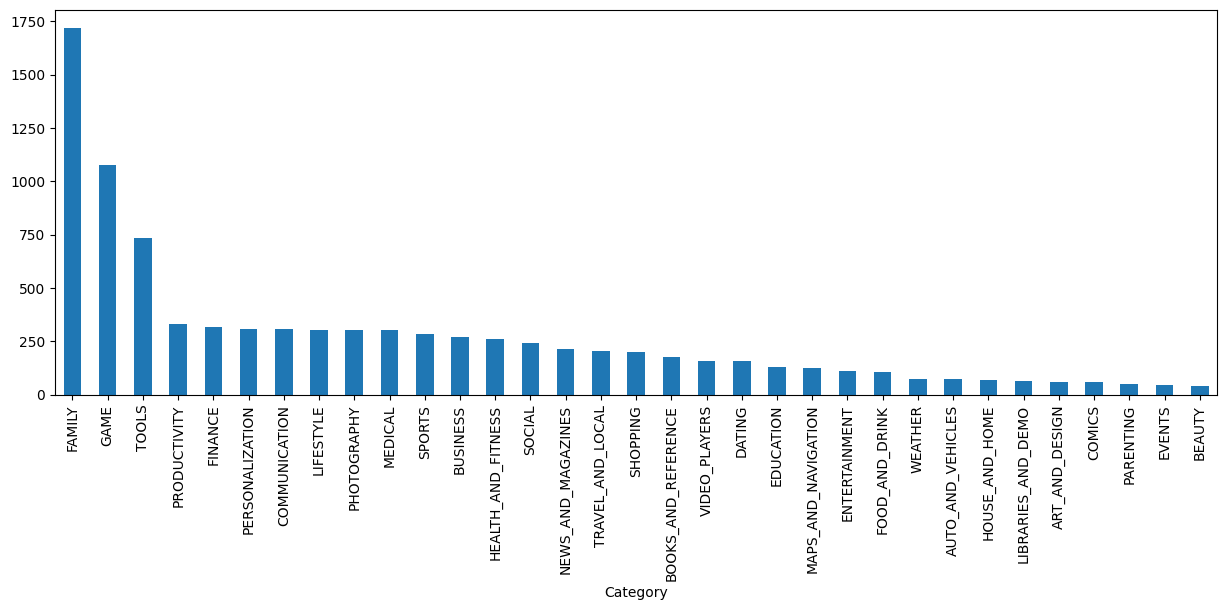

In [ ]:
plt.figure(figsize=(15,5))
df.Category.value_counts().plot(kind="bar")
plt.show()

* From the graph we can say that Family category has huge number of apps and beauty has least number.

**Show all the records which have 5.0 rating.**

In [ ]:
df[(df.Rating == 5.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,2018
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,2018
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,2017
10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,2018-03-05,2.0,2.3 and up,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,2018-06-27,3.8.0,4.1 and up,2018


* We have 271 apps which have 5.0 rating.

**Show all the records which have rating less than 2.0.**

In [ ]:
df[(df.Rating <= 2.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,2018-07-18,6.3.7,5.0 and up,2018
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,2018-07-31,3.52,4.0.3 and up,2018
663,Just She - Top Lesbian Dating,DATING,1.9,954,19M,"100,000+",Free,0,Mature 17+,Dating,2018-07-18,6.3.7,5.0 and up,2018
4006,C by GE,LIFESTYLE,1.7,686,6.6M,"10,000+",Free,0,Everyone,Lifestyle,2018-07-11,4.1.07,4.3 and up,2018
4010,Bridge-C - Get More Storage,TOOLS,2.0,24,35M,"1,000+",Free,0,Everyone,Tools,2017-12-29,1.7,6.0 and up,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,"1,000+",Free,0,Everyone,Education,2018-07-27,5.33.3669,5.0 and up,2018
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100+,Free,0,Everyone,Medical,2018-07-02,2.0.1,4.1 and up,2018
10562,FK Atlantas,SPORTS,1.5,2,26M,5+,Free,0,Everyone,Sports,2018-02-21,1.0,4.1 and up,2018
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27,31M,"5,000+",Free,0,Teen,Entertainment,2017-10-17,2.1,4.0.3 and up,2017


* 67 apps have least rating which is less than 2.0.

**How many apps are paid and how are free for the users??**

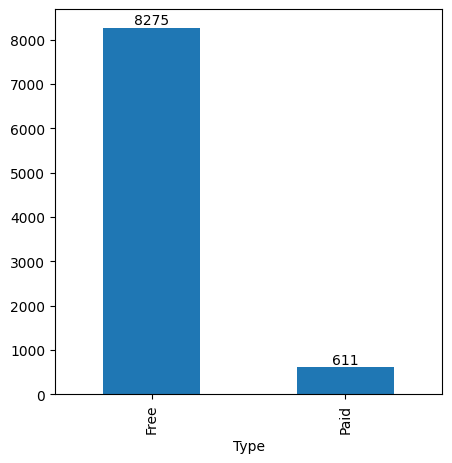

In [ ]:
plt.figure(figsize=(5,5))
df.Type.value_counts().plot(kind="bar")
counts = df.Type.value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


* 611 are paid apps and 8275 are free apps from the dataframe.

**Which year has more apps at updated version?**

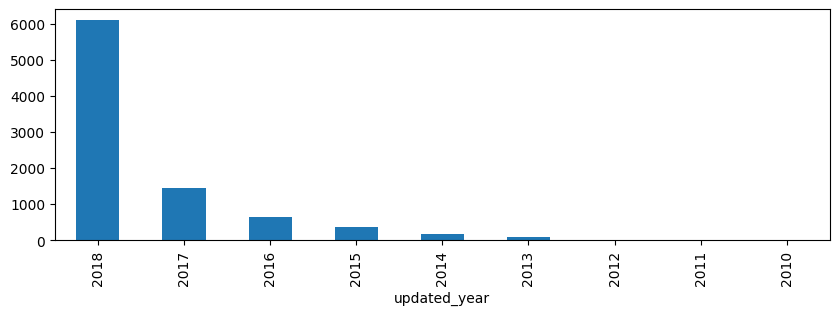

In [ ]:
plt.figure(figsize=(10,3))
df['updated_year'].value_counts().plot(kind="bar")
plt.show()

* 2018 has more apps updated.

In [ ]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
5630,Five nights at Minecraft,FAMILY,3.5,9335,12M,"1,000,000+",Free,0,Everyone,Entertainment,2017-11-26,1.2,4.0.3 and up,2017
7415,The Grand Wars: San Andreas,GAME,3.9,29990,96M,"1,000,000+",Free,0,Teen,Action,2017-12-08,Varies with device,2.3 and up,2017
467,Viber Messenger,COMMUNICATION,4.3,11335255,Varies with device,"500,000,000+",Free,0,Everyone,Communication,2018-07-18,Varies with device,Varies with device,2018
